In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
dataset = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)
dataset.columns = list(range(500))
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825


In [ ]:
dataset_nan = dataset.loc[:, dataset.isnull().any()]
dataset_nan.isnull().sum() / len(dataset) * 100

,0


In [ ]:
dataset.shape

(23479, 500)

Text(0, 0.5, 'bit ADC')

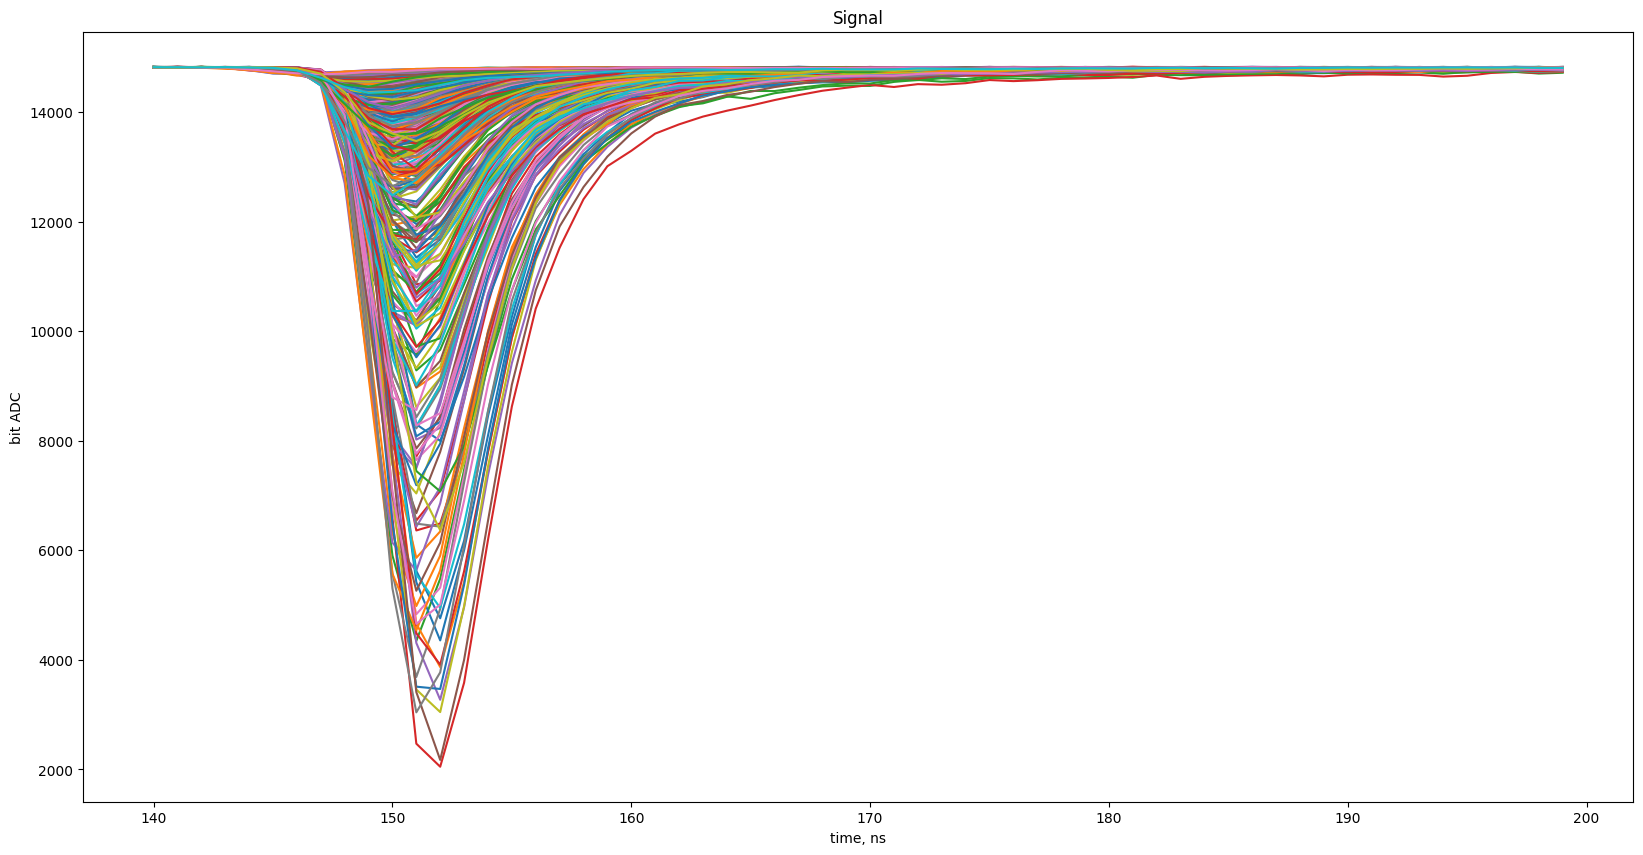

In [ ]:
N=range(0,500)
ax = dataset.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

Text(0, 0.5, 'bit ADC')

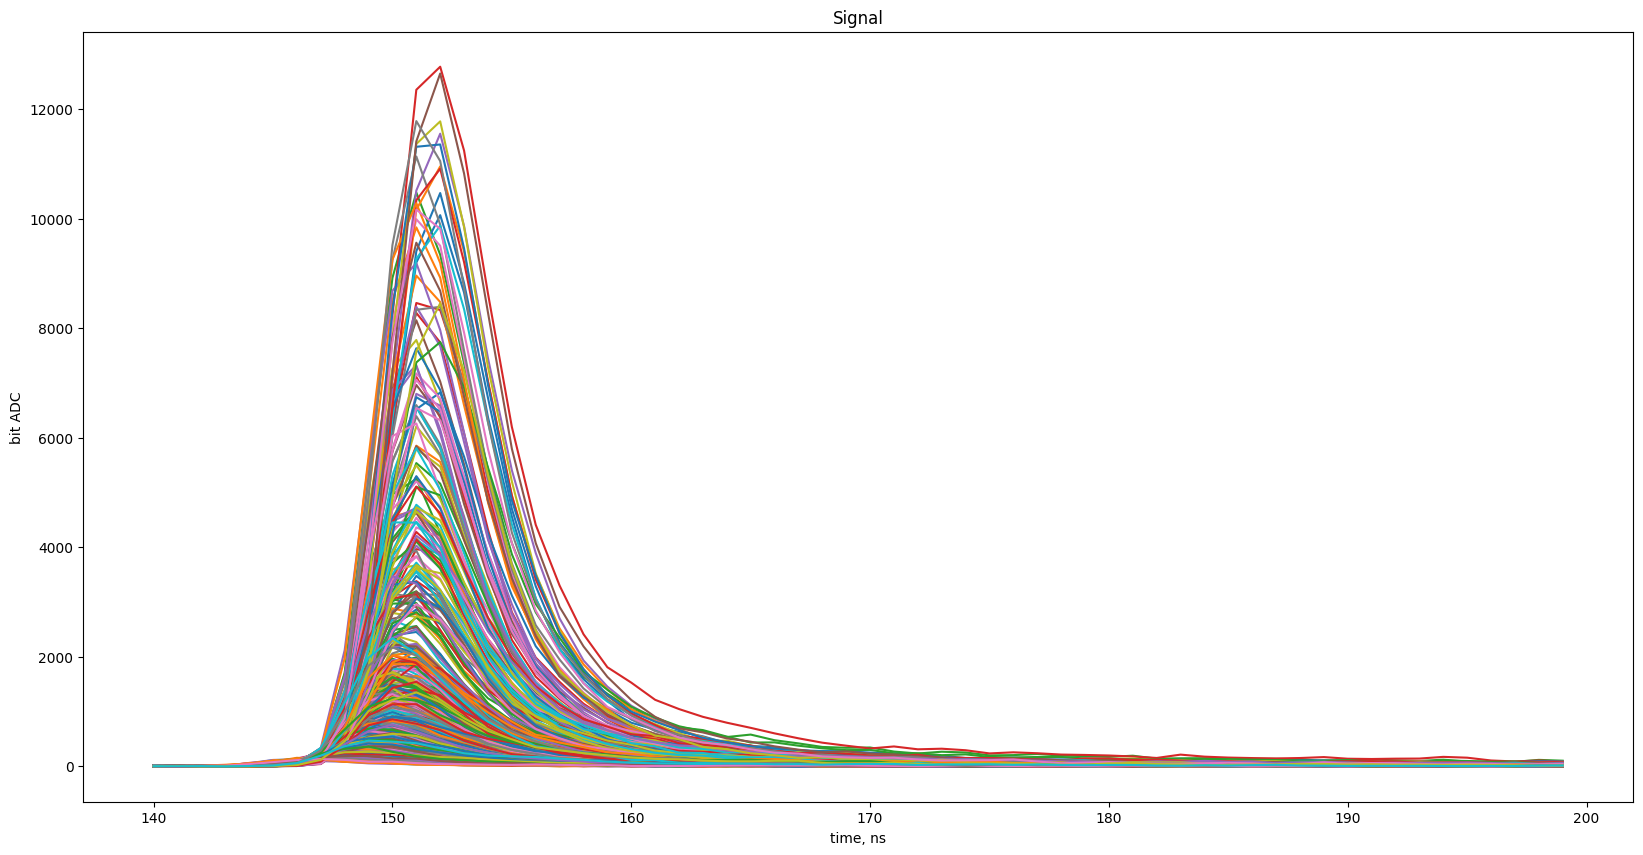

In [ ]:
ax = (2**14-dataset.T[N]-1560)[140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

In [ ]:
df = dataset.loc[:, dataset.columns[140:200]]
y = np.array(-df.loc[:,:] + 2**14 - 1560).T
area = trapezoid(y, axis = 0)
cl = pd.DataFrame((area))
cl.columns = ['area']
cl

,area
0,4159.5
1,11815.0
2,16414.5
3,4213.0
4,11453.0
...,...
23474,3297.5
23475,41366.5
23476,35329.0
23477,10965.5


In [ ]:
amplitude = df.max(axis=1) - df.min(axis=1)
cl['amplitude'] = amplitude

In [ ]:
cl

,area,amplitude
0,4159.5,532
1,11815.0,1903
2,16414.5,2564
3,4213.0,569
4,11453.0,1796
...,...,...
23474,3297.5,509
23475,41366.5,5769
23476,35329.0,5002
23477,10965.5,1460


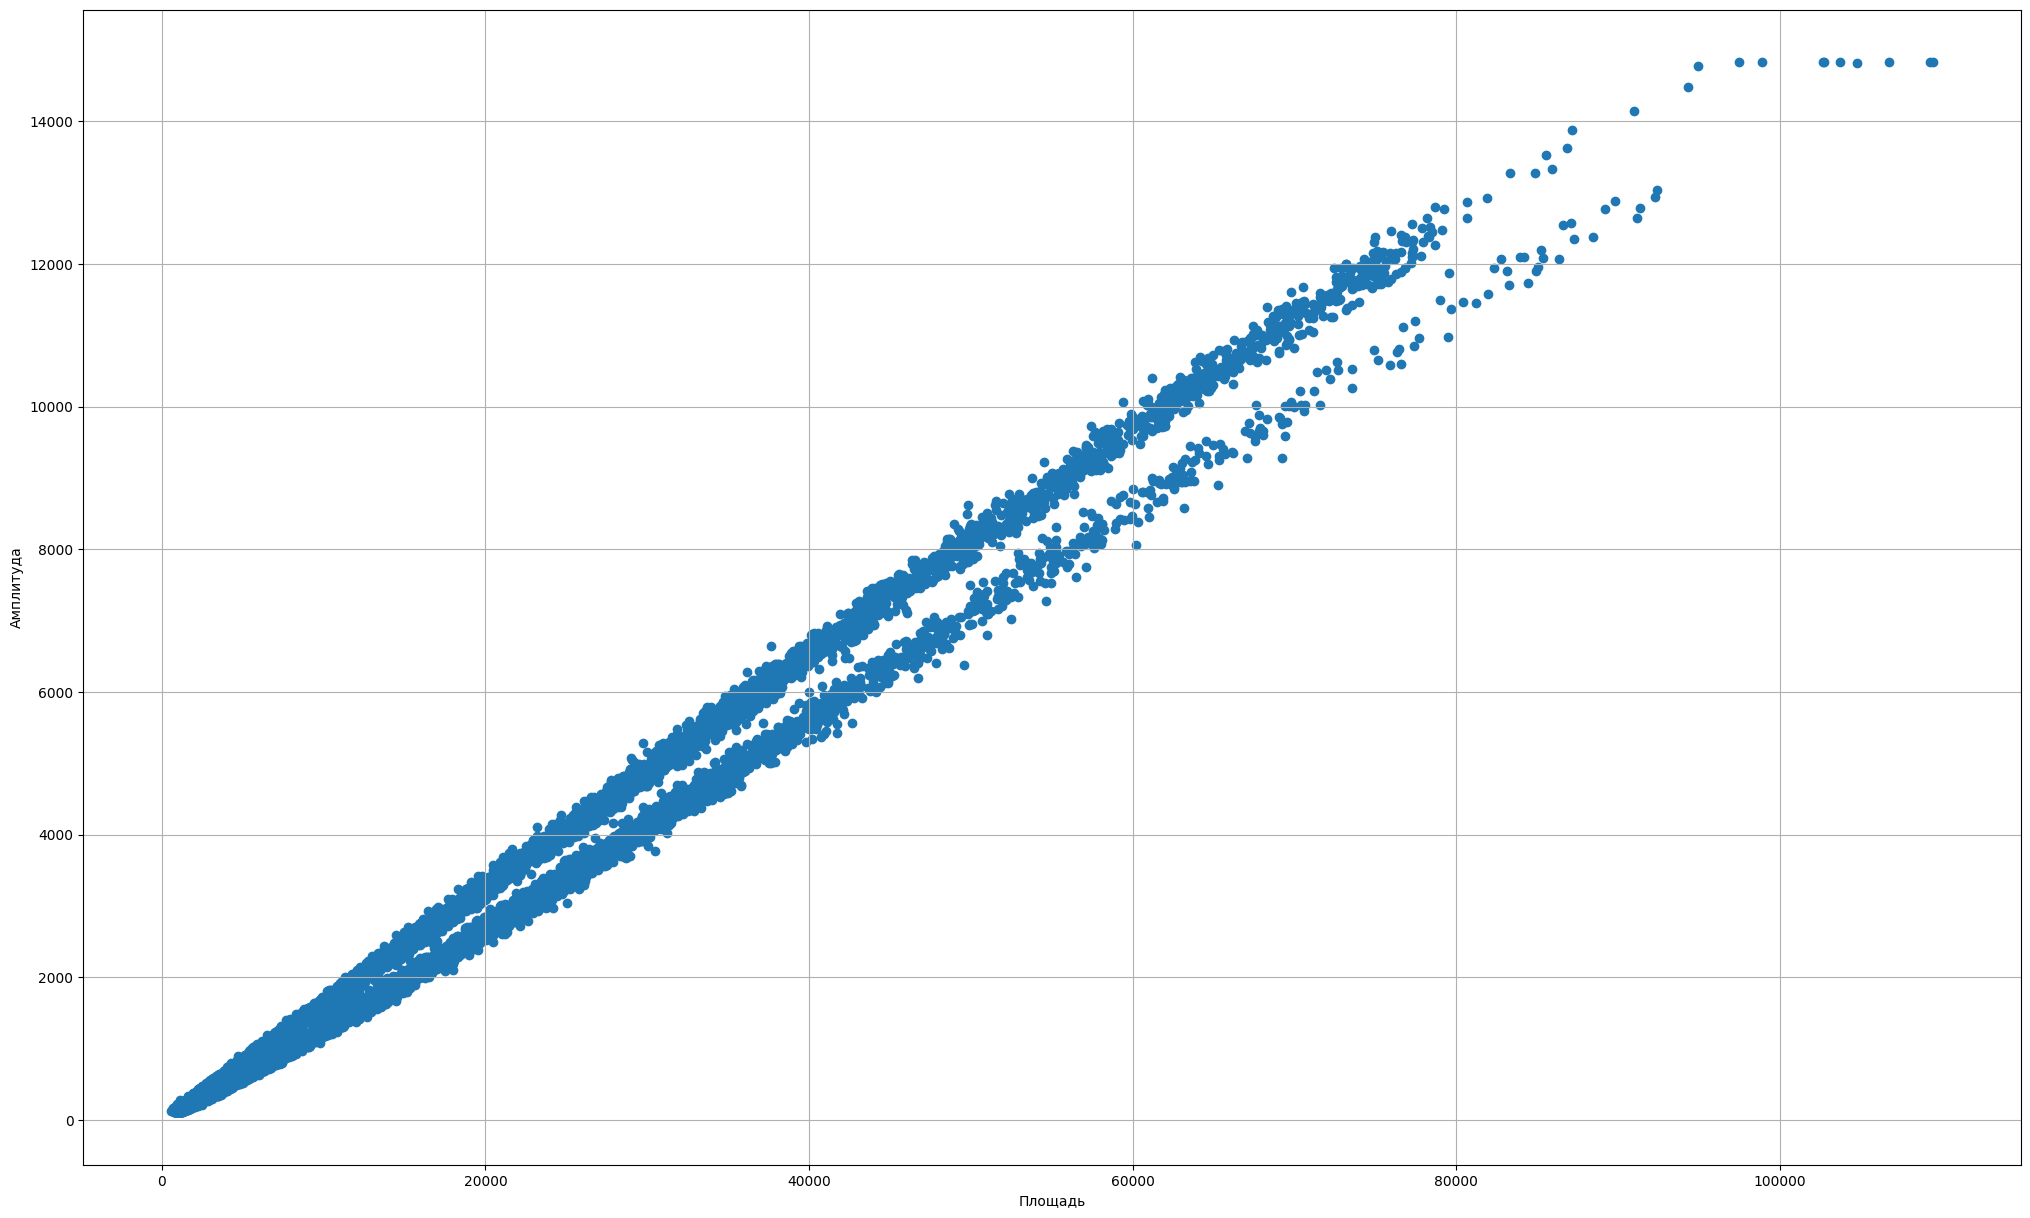

In [ ]:
plt.figure(figsize=(25, 15))
plt.scatter(cl['area'], cl['amplitude'])
plt.xlabel("Площадь")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

Text(0, 0.5, 'bit ADC')

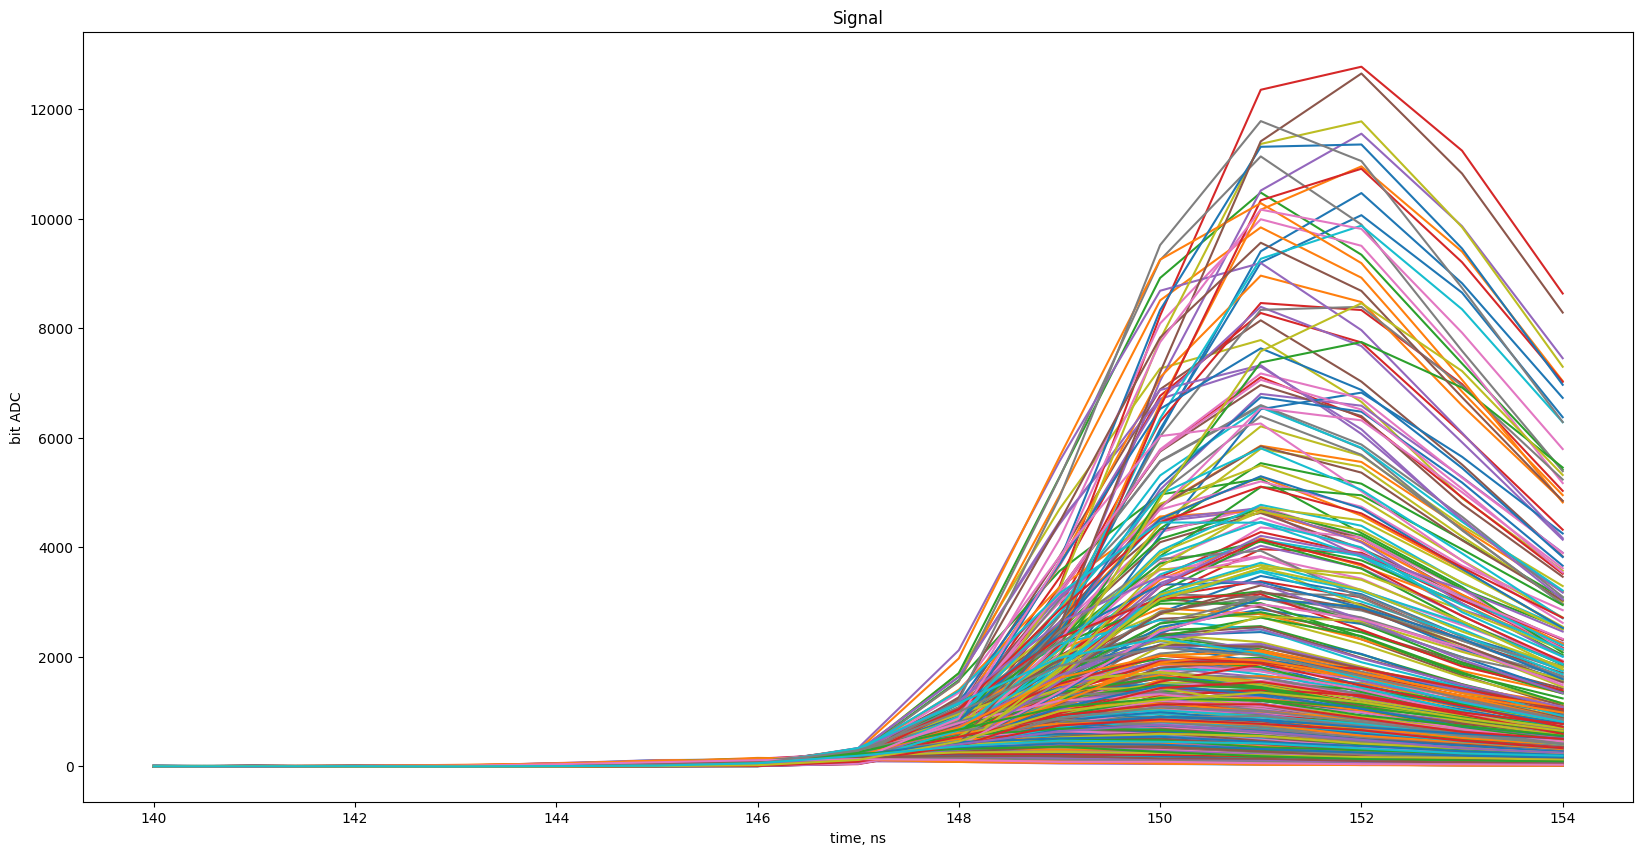

In [ ]:
ax = (2**14-dataset.T[N]-1560)[140:155].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

In [ ]:
area1 = np.array(-dataset.loc[:,140:156] + 2**14 - 1560)
short_area = trapezoid(area1)

In [ ]:
area2 = np.array(-dataset.loc[:,140:200] + 2**14 - 1560)
long_area = trapezoid(area2)

In [ ]:
cl['psd'] = pd.DataFrame((long_area  - short_area )/(long_area))
cl.describe()

,area,amplitude,psd
count,23479.000000,23479.000000,23479.000000
mean,12357.086631,1838.602198,0.216207
std,15312.678227,2388.863003,0.065776
min,581.500000,108.000000,-0.055030
25%,2292.750000,312.000000,0.156279
50%,5782.000000,816.000000,0.218553
75%,16016.000000,2318.500000,0.277881
max,109436.000000,14828.000000,0.376755


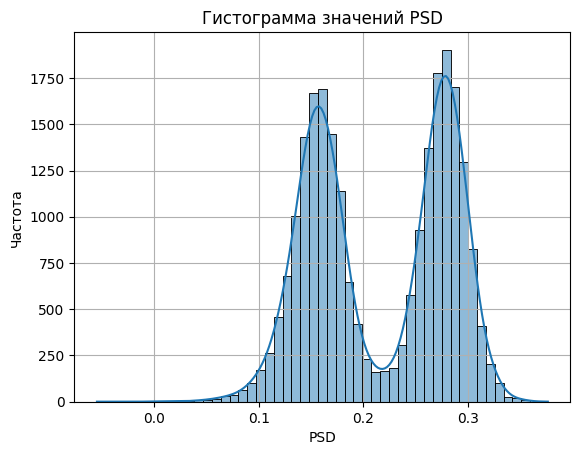

In [ ]:
sns.histplot(cl['psd'], kde=True)

plt.xlabel('PSD')
plt.ylabel('Частота')
plt.title('Гистограмма значений PSD')
plt.grid(True)
plt.show()

In [ ]:
cl['ratio'] = cl['amplitude']/cl['area']

In [ ]:
cl.describe()

,area,amplitude,psd,ratio
count,23479.000000,23479.000000,23479.000000,23479.000000
mean,12357.086631,1838.602198,0.216207,0.142707
std,15312.678227,2388.863003,0.065776,0.020537
min,581.500000,108.000000,-0.055030,0.084817
25%,2292.750000,312.000000,0.156279,0.125155
50%,5782.000000,816.000000,0.218553,0.141896
75%,16016.000000,2318.500000,0.277881,0.161241
max,109436.000000,14828.000000,0.376755,0.260393


In [ ]:
cl['cluster'] = cl.apply(lambda row: int(row['psd'] > 0.23) + int(row['psd'] > 0.22 and row['psd'] <= 0.23) * 2, axis=1)

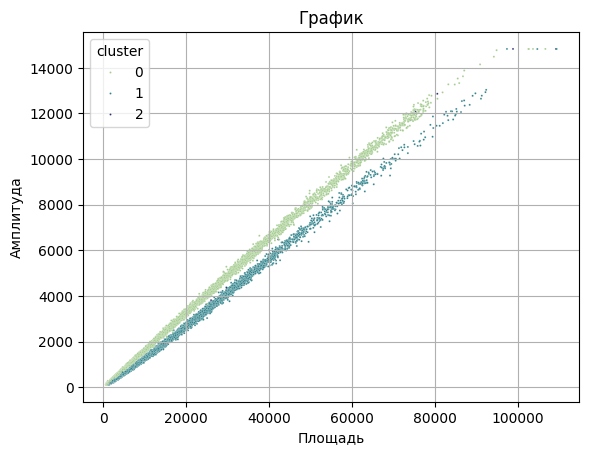

In [ ]:
sns.scatterplot(data=cl, x='area', y='amplitude', hue='cluster', s = 2, palette = "crest")
plt.xlabel("Площадь")
plt.ylabel("Амплитуда")
plt.title("График")
plt.grid(True)
plt.show()

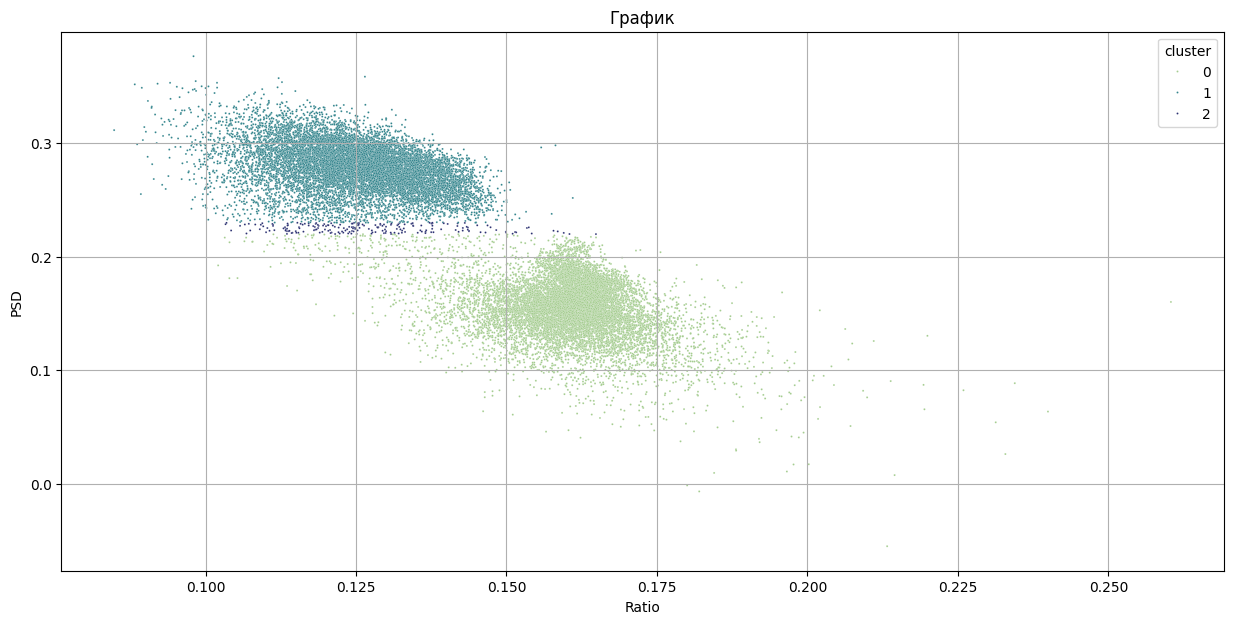

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=cl, x='ratio', y='psd', hue='cluster', s = 2, palette = "crest")
plt.xlabel("Ratio")
plt.ylabel("PSD")
plt.title("График")
plt.grid(True)

In [ ]:
cl['mcluster'] = np.zeros(23479).T

scaler = StandardScaler()
X_scaled = cl.drop(['mcluster','area','amplitude'], axis = 1)

kmeans = KMeans(n_clusters=3, random_state=7,algorithm = 'lloyd', n_init = 5)
labels_kmeans = kmeans.fit_predict(X_scaled)


silhouette_avg_kmeans = silhouette_score(X_scaled, labels_kmeans)
samples = silhouette_samples(X_scaled, labels_kmeans)

print(f"KMeans: Silhouette score = {silhouette_avg_kmeans}")

KMeans: Silhouette score = 0.9701992699514321


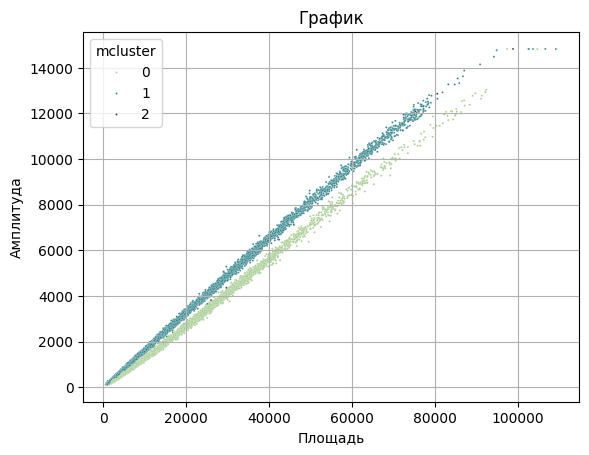

In [ ]:
cl['mcluster'] = pd.DataFrame((labels_kmeans))
sns.scatterplot(data=cl, x='area', y='amplitude', hue='mcluster', s = 2, palette = "crest" )
plt.xlabel("Площадь")
plt.ylabel("Амплитуда")
plt.title("График")
plt.grid(True)
plt.show()

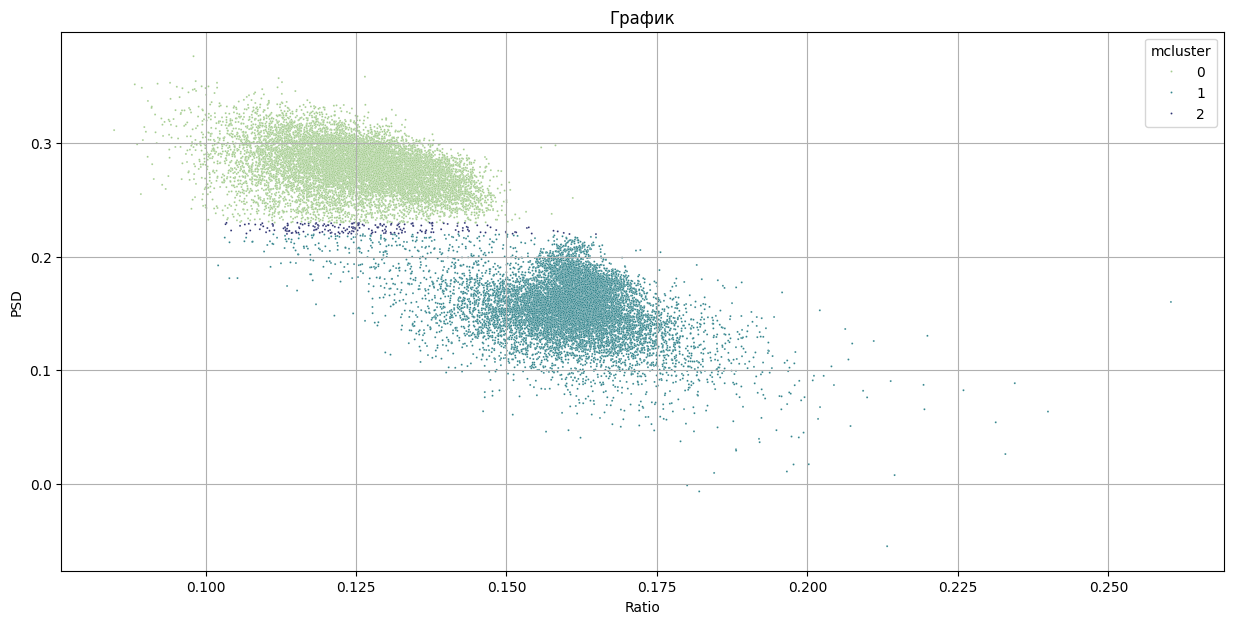

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data=cl, x='ratio', y='psd', hue='mcluster', s = 2, palette = "crest" )
plt.xlabel("Ratio")
plt.ylabel("PSD")
plt.title("График")
plt.grid(True)

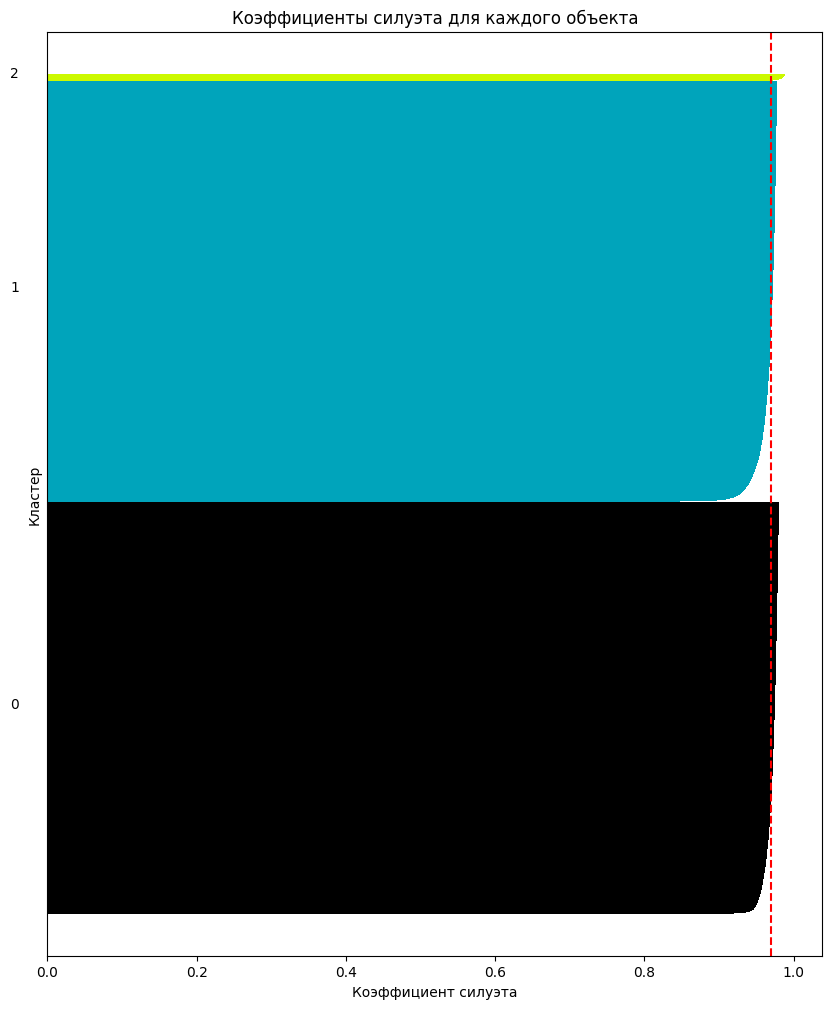

In [ ]:
# Вычисление коэффициентов силуэта
silhouette_avg = silhouette_avg_kmeans
sample_silhouette_values = samples

# Сортировка данных по кластерам и коэффициентам силуэта
n_clusters = len(np.unique(labels_kmeans))
y_lower = 10

fig, ax = plt.subplots(1,1,figsize=(10,12))

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels_kmeans == i]
    ith_cluster_silhouette_values = np.sort(ith_cluster_silhouette_values) # Сортируем по возрастанию
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)

    for j in range(size_cluster_i):
        ax.barh(y_lower + j, ith_cluster_silhouette_values[j], height=1, color=color)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10


ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Коэффициент силуэта")
ax.set_ylabel("Кластер")
ax.set_title("Коэффициенты силуэта для каждого объекта")
ax.set_yticks([])

plt.show()

In [ ]:
df_result = pd.DataFrame({'cluster': cl['mcluster'].astype(int)})

df_result.index.name = 'index'
df_result = df_result.sort_values(by=['cluster'])
print(df_result)
df_result.to_csv('output.csv', index=True)

       cluster
index         
0            0
9564         0
9566         0
9567         0
9568         0
...        ...
8342         2
18332        2
18960        2
8033         2
13699        2

[23479 rows x 1 columns]
